# Data integration using Conos
This notebook shows how to us the scIB package to do data integration on 3 scATAC-Seq datasets. The three datasets are from:
* 10X Genomics
* Fang et al. 2019
* Published data on GEO, GSM3034638

In [ ]:
import scIB
import scanpy as sc
import anndata as ad
import copy
import pickle
import os

In [2]:
sc.settings.set_figure_params(dpi=80, dpi_save=400)
cwd = os.getcwd()
cwd

'/mnt/znas/icb_zstore01/groups/ce01/workspace/Benchmarking_data_integration/notebooks/integration'

# Read the data

In [3]:
finput="../../data/brain_atac_fang_10x/merge_10x_CEMBA180312_3B_bin_merged_filterRowCol_filterCountCell_regression.h5ad"
adata = ad.read(finput)

In [4]:
adata

AnnData object with n_obs × n_vars = 13189 × 54539 
    obs: 'batch', 'n_genes', 'batchname', 'n_counts'
    var: 'overlap10x-0', 'chrom-1', 'chrom2-1', 'n_cells-1', 'n_cells'
    uns: 'batchname_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'

# Before integration

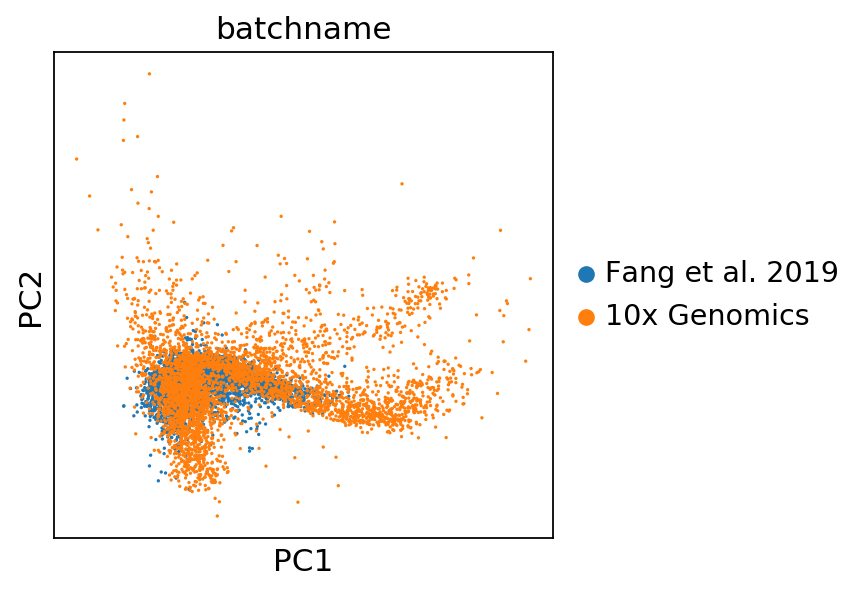

In [5]:
sc.pl.pca(adata,color='batchname')

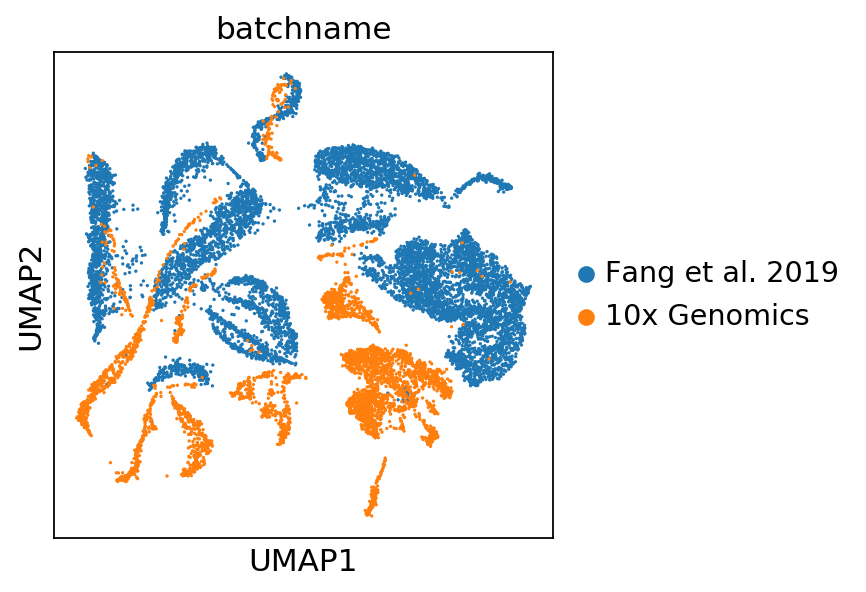

In [6]:
sc.pl.umap(adata,color='batchname')

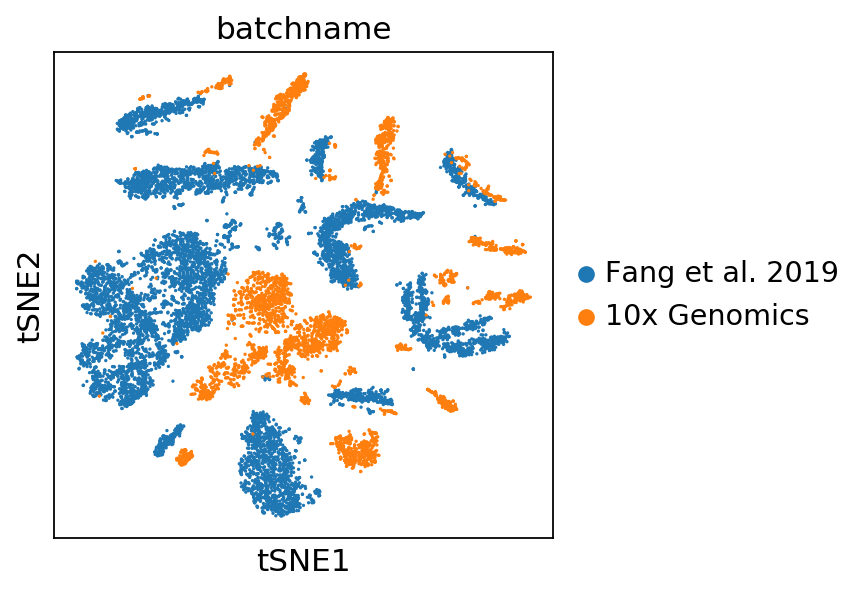

In [7]:
sc.pl.tsne(adata,color='batchname')

# Integration

In [8]:
res=scIB.integration.runConos(adata, batch='batch')

RRuntimeError: Error: No data in provided assay - counts


In [ ]:
res

In [ ]:
foutput="../../data/brain_atac_fang_10x/atac_brain_result_Conos.pickle"

with open(foutput, 'wb') as handle:
    pickle.dump(res, handle, protocol=pickle.HIGHEST_PROTOCOL)
    

# After integration

In [ ]:
finput="../../data/brain_atac_fang_10x/atac_brain_result_Conos.pickle"
with open(finput, 'rb') as handle:
    integrated_res = pickle.load(handle)

In [ ]:
toplot = copy.copy(adata)
toplot.obsm['X_pca'] = integrated_res[0]

sc.pp.neighbors(toplot)
sc.tl.umap(toplot)
sc.tl.tsne(toplot)

In [ ]:
toplot

In [ ]:
fplot="_brain_atac_after_integration_Conos.pdf"
sc.pl.pca(toplot, color='batchname',save=fplot)
sc.pl.pca(toplot, color='batchname')

In [ ]:
fplot="_brain_atac_after_integration_Conos.pdf"
sc.pl.umap(toplot, color='batchname',save=fplot)
sc.pl.umap(toplot, color='batchname')

In [ ]:
fplot="_brain_atac_after_integration_Conos.pdf"
sc.pl.tsne(toplot, color='batchname',save=fplot)
sc.pl.tsne(toplot, color='batchname')